In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, exposure, filters, color
from scipy import ndimage

# Import Original Image

(800, 500)


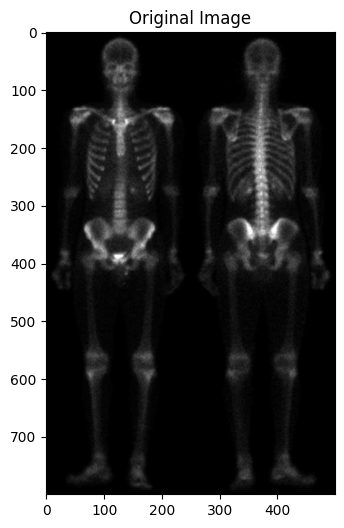

In [ ]:
# Import image
skeleton_image = io.imread("/content/HW_Image2.tif")

# Shape of image
print(skeleton_image.shape)

# Plot image
plt.figure(figsize=(12, 6))
plt.imshow(skeleton_image, cmap="gray")
plt.title("Original Image")
plt.show()

# Laplacian Filter

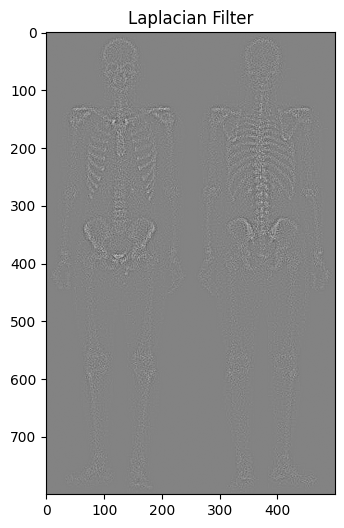

In [ ]:
# Laplacian Filter
laplacian_filtered_image = filters.laplace(skeleton_image, ksize=3)

# Plot image
plt.figure(figsize=(12, 6))
plt.imshow(laplacian_filtered_image, cmap="gray")
plt.title("Laplacian Filter")
plt.show()


# Sharpened Image

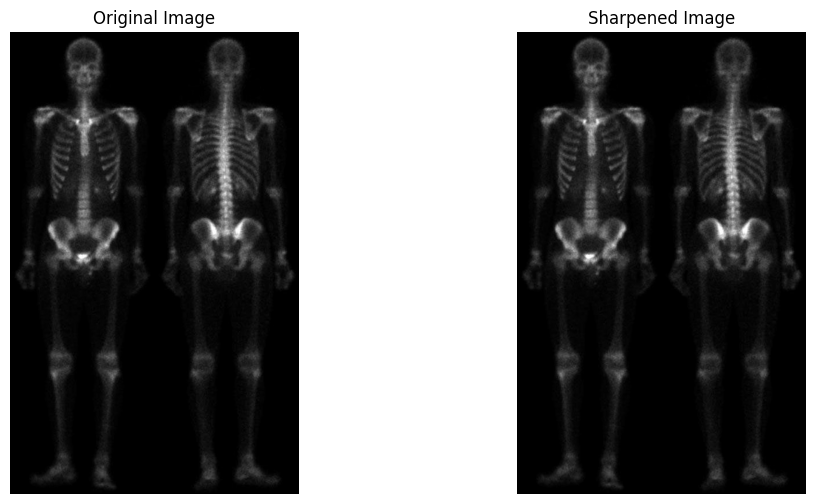

In [ ]:
sharpened_image = skeleton_image - laplacian_filtered_image

# Plot Images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(skeleton_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Sharpened image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap="gray")
plt.title("Sharpened Image")
plt.axis("off")

plt.show()

# Sobel Operator

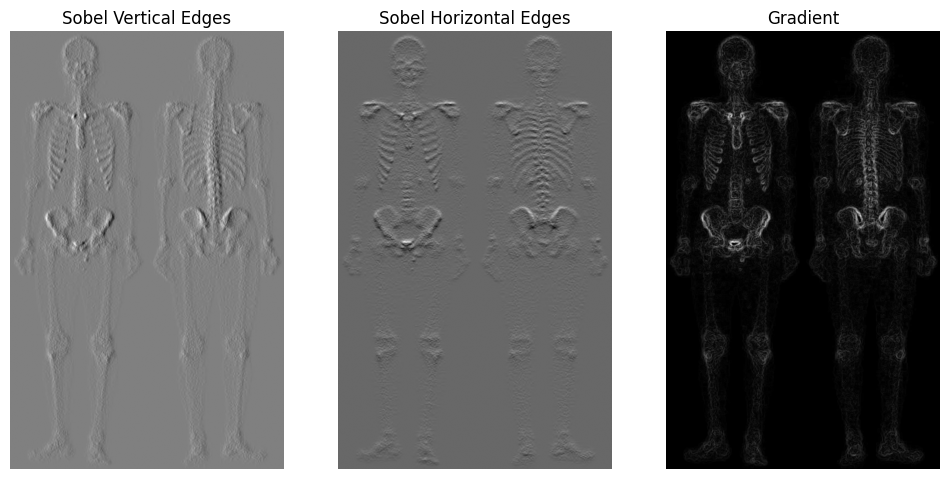

In [ ]:
# Sobel Vertical and Horizontal Edges
img_edge_vertical = filters.sobel_v(skeleton_image)
img_edge_horizontal = filters.sobel_h(skeleton_image)

# Gradient of both Sobel operators
sobel = filters.sobel(skeleton_image)

# Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_edge_vertical, cmap="gray")
plt.title("Sobel Vertical Edges")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_edge_horizontal, cmap="gray")
plt.title("Sobel Horizontal Edges")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(sobel, cmap="gray")
plt.title("Gradient")
plt.axis("off")

plt.show()



# Sobel Image Smoothed with 5x5 Filter

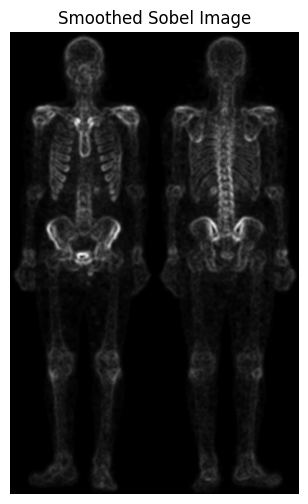

In [ ]:
# Create 5x5 kernal filter
kernel = np.ones((5, 5)) * 1/5

sobel_smoothed = ndimage.convolve(sobel, kernel)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(sobel_smoothed, cmap="gray")
plt.title("Smoothed Sobel Image")
plt.axis("off")
plt.show()

# Mask of Product of Laplacian and Smoothed Sobel Images

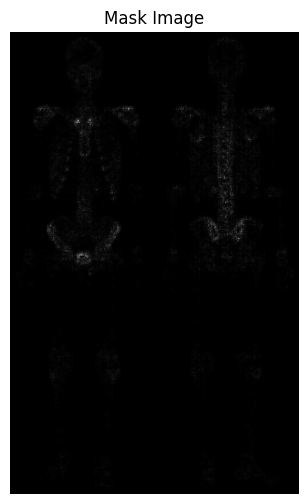

In [ ]:
# Get the Product
mask_image = laplacian_filtered_image * sobel_smoothed

# Remove negative values
mask_abs = np.abs(mask_image)
mask_norm = (mask_abs - mask_abs.min()) / (mask_abs.max() - mask_abs.min())

plt.figure(figsize=(12, 6))
plt.imshow(mask_norm, cmap="gray")
plt.title("Mask Image")
plt.axis("off")
plt.show()



# Sharpened Image adding Original and Mask

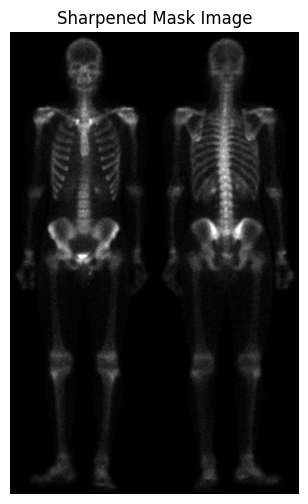

In [ ]:
sharped_image_mask = skeleton_image + mask_norm

plt.figure(figsize=(12, 6))
plt.imshow(sharped_image_mask, cmap="gray")
plt.title("Sharpened Mask Image")
plt.axis("off")
plt.show()


# Power Law Transformation

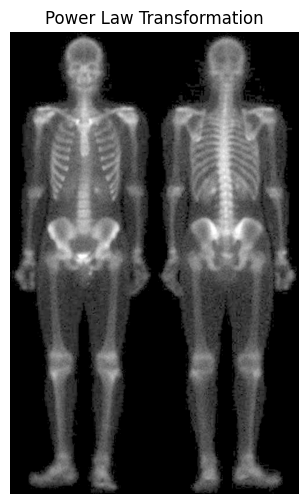

In [ ]:
# Power law transformation gamma exposure
power_law_image = exposure.adjust_gamma(sharped_image_mask, 0.4)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(power_law_image, cmap="gray")
plt.title("Power Law Transformation")
plt.axis("off")
plt.show()

# Final Images

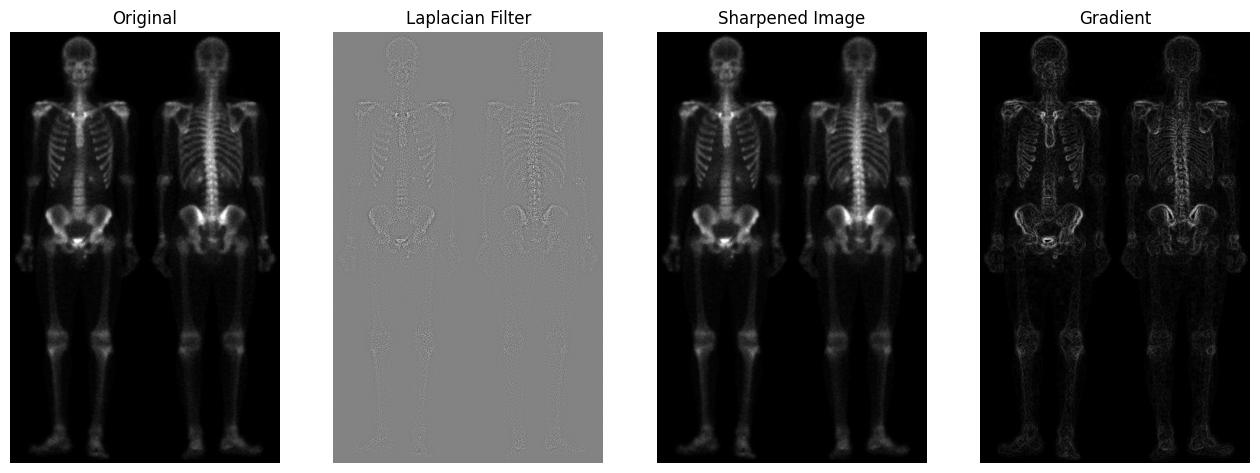

In [ ]:
plt.figure(figsize=(16, 8))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(skeleton_image, cmap="gray")
plt.title("Original")
plt.axis("off")

# Laplacian Image
plt.subplot(1, 4, 2)
plt.imshow(laplacian_filtered_image, cmap="gray")
plt.title("Laplacian Filter")
plt.axis("off")

# Sharpened Image with Orginal and Laplacian
plt.subplot(1, 4, 3)
plt.imshow(sharpened_image, cmap="gray")
plt.title("Sharpened Image")
plt.axis("off")

# Sobel Gradient
plt.subplot(1, 4, 4)
plt.imshow(sobel, cmap="gray")
plt.title("Gradient")
plt.axis("off")

plt.show()

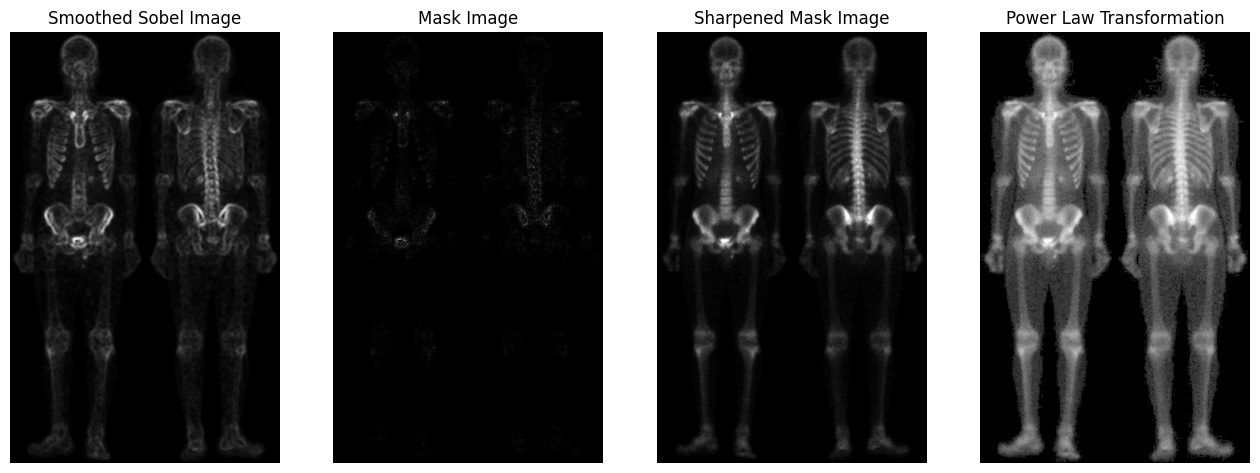

In [ ]:
plt.figure(figsize=(16, 8))

# Sobel smoothed with 5x5 Filter
plt.subplot(1, 4, 1)
plt.imshow(sobel_smoothed, cmap="gray")
plt.title("Smoothed Sobel Image")
plt.axis("off")

# Mask with Laplacian and Smoothed Sobel Image
plt.subplot(1, 4, 2)
plt.imshow(mask_norm, cmap="gray")
plt.title("Mask Image")
plt.axis("off")

# Original Image and Mask
plt.subplot(1, 4, 3)
plt.imshow(sharped_image_mask, cmap="gray")
plt.title("Sharpened Mask Image")
plt.axis("off")

# Power Law Image
plt.subplot(1, 4, 4)
plt.imshow(power_law_image, cmap="gray")
plt.title("Power Law Transformation")
plt.axis("off")

plt.show()